# Deep Learning Fundamentals - Part 2

Last time in our [Part 1 notebook](https://colab.research.google.com/drive/1daGU2IlT3I-pcAHIFOYftyda19Wk0p2b), we walked through some basic matrix operations and built a simple multi-layer perceptron to do the task of *regression*.

In regression, our input $\mathbf{x}$ was a vector of D real numbers $x_1, x_2, ..., x_D$, and our output was a single real number $y$.

In this notebook, we will introduce the task of *classification*.
Our input will be exactly the same as before, but our output will be a *one-hot* vector of binary numbers, such that only one position is set to 1.
For example, if we have 3 classes, our possible outputs are $[0, 0, 1]$, $[0, 1, 0]$, and $[1, 0, 0]$.

## Regression

First, we'll remember what we did last time, and see how it works in Keras and in PyTorch.

x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


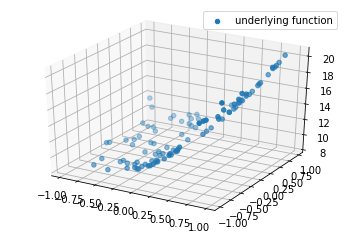

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

num_data = 100
input_dim = 2

x = np.random.uniform(-1, 1, (num_data, input_dim)).astype(np.float32)

weights_true = np.array([[5, 1], ]).T
bias_true = np.array([10])
y = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y.shape}')

def plot_3d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y)

In [0]:
num_hidden = 100
num_epochs = 20
lr = 0.1

In [0]:
## Tensorflow 2.0 / Keras

from tensorflow import keras

# Define the model
model = keras.models.Sequential([
  keras.layers.Dense(num_hidden, input_shape=(input_dim, ), activation='relu'),
  keras.layers.Dense(1)
])

# Instantiate the optimizer and loss functions and initialize the model with them.
optimizer = keras.optimizers.SGD(lr)
loss_fn = keras.losses.MSE
model.compile(loss=loss_fn, optimizer=optimizer)

# Fit on our data
model.fit(x, y, epochs=num_epochs)

# Look at the results
y_pred = model.predict(x)
plot_3d(x, y, model(x))

NameError: ignored

Epoch 1/20
4/4 [==============================] - 0s 2ms/step - loss: 78.5696
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 28.4445
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 2.2867
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 1.0933
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 1.2754
Epoch 6/20
4/4 [==============================] - 0s 2ms/step - loss: 1.4019
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 3.1972
Epoch 8/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5146
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2449
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4764
Epoch 11/20
4/4 [==============================] - 0s 2ms/step - loss: 0.1919
Epoch 12/20
4/4 [==============================] - 0s 2ms/step - loss: 1.2719
Epoch 13/20
4/4 [==============================] - 0s 2ms/step - loss: 

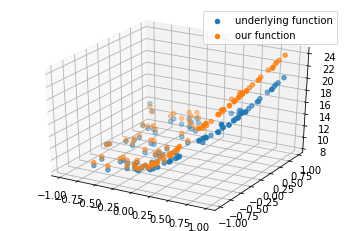

In [0]:
# We can also make our model another way:
class MLP(keras.models.Model):
  def __init__(self):
    super(MLP, self).__init__()
    self.hidden = keras.layers.Dense(num_hidden, input_shape=(input_dim, ), activation='relu')
    self.regression = keras.layers.Dense(1)

  def call(self, x):
    return self.regression(self.hidden(x))

model = MLP()

# The rest is the same as before!
model.compile(loss=loss_fn, optimizer=optimizer)

model.fit(x, y, epochs=num_epochs)

y_pred = model.predict(x)
plot_3d(x, y, model(x))

Epoch: 0: 169.43685108202538
Epoch: 1: 170.15147728512846
Epoch: 2: 164.23370632700582
Epoch: 3: 107.939692417711
Epoch: 4: 69.24313237529628
Epoch: 5: 36.719988222678055
Epoch: 6: 8.007745687923506
Epoch: 7: 3.9050443319933406
Epoch: 8: 3.069225229847339
Epoch: 9: 2.1359775118195
Epoch: 10: 2.7106723459254196
Epoch: 11: 1.931093102228956
Epoch: 12: 2.5195495480394534
Epoch: 13: 1.7129226214922377
Epoch: 14: 2.1505262336315085
Epoch: 15: 1.4391529774267167
Epoch: 16: 1.7208314535417446
Epoch: 17: 1.1737956780296768
Epoch: 18: 1.3317373823898555
Epoch: 19: 0.9407660919441341


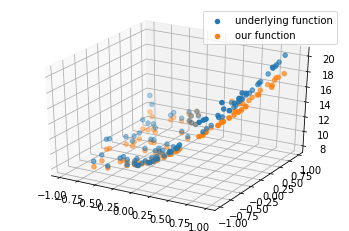

In [0]:
## PyTorch

import torch

# Convert from numpy arrays to torch tensors (basically the same thing)
x_torch = torch.tensor(x)
y_torch = torch.tensor(y)

# Define the model
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, num_hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(num_hidden, 1),
)

# Make the loss and optimizer objects
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Train the model. Instead of a brain-dead simple fit() method, we write a minimal amount of code.
# This is just like the code we wrote in our Deep Learning Fundamentals - Part 1 notebook!
for epoch in range(num_epochs):
    y_pred = model(x_torch)

    loss = loss_fn(y_torch, y_pred)
    print(f'Epoch: {epoch}: {loss.item()}')

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

y_pred = model(x_torch).detach()
plot_3d(x, y, y_pred)

Epoch: 0: 163.6454006604966
Epoch: 1: 116.91138300126033
Epoch: 2: 158.8021420277616
Epoch: 3: 105.54135657627407
Epoch: 4: 71.07386167164093
Epoch: 5: 47.551585760092365
Epoch: 6: 28.502411103832024
Epoch: 7: 9.443438285410865
Epoch: 8: 1.3192654865423719
Epoch: 9: 0.8450090455803122
Epoch: 10: 0.6074422279642555
Epoch: 11: 0.4820286938003449
Epoch: 12: 0.40182042320693634
Epoch: 13: 0.3511644768567537
Epoch: 14: 0.3135028162552819
Epoch: 15: 0.28445488363511784
Epoch: 16: 0.2592736208956757
Epoch: 17: 0.23952772824456475
Epoch: 18: 0.22276687343276005
Epoch: 19: 0.2088332357494425


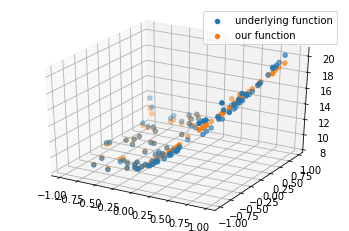

In [0]:
# Another way to define the model

class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = torch.nn.Linear(input_dim, num_hidden)
        self.regression = torch.nn.Linear(num_hidden, 1)

    def forward(self, x):
        x = self.hidden(x)
        x = torch.nn.functional.relu(x)
        return self.regression(x)

model = MLP()

# The rest is the same as before!
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    y_pred = model(x_torch)

    loss = loss_fn(y_torch, y_pred)
    print(f'Epoch: {epoch}: {loss.item()}')

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

y_pred = model(x_torch).detach()
plot_3d(x, y, y_pred)

## Classification

Now that we've seen how similar Tensorflow/Keras and PyTorch are, let's proceed with one as we start on classification. We'll work with Keras just because it's slightly less code.

The classic classification example is MNIST.

In [0]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

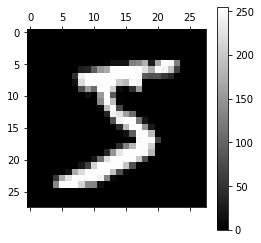

In [0]:
# A single input is a 28x28 image of a handwritten digit
plt.matshow(x_train[0], cmap='gray')
plt.colorbar()

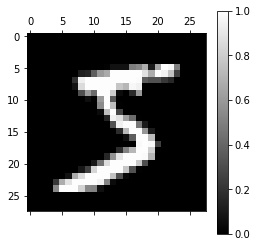

In [0]:
# Look like the scale is 0-255 (these are uint8 images).
# For working with neural networks, we should either
# a) convert to 0-1 ("normalize")
# b) subtract mean and divide by standard deviation ("standardize") -> mean of 0, std of 1

x_train = x_train / 255
x_test = x_test / 255

plt.matshow(x_train[0], cmap='gray')
plt.colorbar()

In [0]:
# A single output is a number from 0 to 9 (the digits, basically)
y_train[0]

5

In [0]:
# Let's convert the inputs to 28 * 28 = 784-dimensional vectors
num_train = x_train.shape[0]
x_train = x_train.reshape(num_train, -1)  # -1 makes numpy compute the dimension

num_test = x_test.shape[0]
x_test = x_test.reshape(num_test, -1)

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [0]:
# Let's convert the outputs to 10-dimensional one-hot vectors

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

y_train.shape, y_test.shape, y_train[0]

((60000, 10),
 (10000, 10),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [0]:
# Let's train a model! We'll use the same basic MLP architecture as before.

input_dim = x_train.shape[1]  # 784
num_hidden = 10
output_dim = y_train.shape[1]  # 10

# Define the model
model = keras.models.Sequential([
  keras.layers.Dense(num_hidden, input_shape=(input_dim, ), activation='relu'),  # Same as before!
  keras.layers.Dense(output_dim, activation='softmax')  # We're now outputting a 10-dimensional vector, and the activation is "softmax". What is that?
])

In [0]:
# Aside: what is softmax for?
# Our MLP layers output activations, or logits, that are not scaled in any particular way.
# But for predicting the class of an input, we want to output something like probabilities of each class (values between 0 and 1 that all sum to 1)
# Note that probabilities are often called "likelihoods" in this context

# So our logits might be [-1, 0, 2]
# And our output should be something like [0, 0.1, 0.9] (just eyeballing!)

def softmax(x):
  return np.exp(x) / np.exp(x).sum()

print(softmax([-1, 0, 2]))

[0.04201007 0.1141952  0.84379473]


In [0]:
# Instantiate the optimizer and loss functions and initialize the model with them.
optimizer = keras.optimizers.SGD(lr)
loss_fn = keras.losses.categorical_crossentropy

# Aside: categorical cross-entropy sounds scary, but it's pretty simple:
def categorical_crossentropy(y_true, y_pred):
  # y_true = [0,    0,    1]
  # y_pred = [0.04, 0.11, 0.84]

  # -np.log(0.84)

  return -sum(
      y_true[i] * np.log(y_pred[i] + 1e-6)  # adding a small value to avoid the undefined log(0)
      for i in range(len(y_true))
  )
# Note that only one element of y_true is going to be non-zero!
# So it's basically saying "negative log of the predicted likelihood of the correct class"
# Or "negative log likelihood" for short

print(categorical_crossentropy([1, 0, 0], [0.9, 0.1, 0]))
print(keras.losses.categorical_crossentropy([1, 0, 0], [0.9, 0.1, 0]))

print(categorical_crossentropy([1, 0, 0], [0.1, 0.9, 0]))
print(keras.losses.categorical_crossentropy([1, 0, 0], [0.1, 0.9, 0]))

0.10535940454733242
tf.Tensor(0.105360545, shape=(), dtype=float32)
2.3025750930440454
tf.Tensor(2.3025851, shape=(), dtype=float32)


In [0]:
# Okay, let's compile our model, and also throw in a metric to be printed at the end of each epoch
model.compile(loss=loss_fn, metrics='accuracy', optimizer=optimizer)

num_epochs = 10

# Fit on our data
model.fit(x_train, y_train, epochs=10000, validation_data=(x_test, y_test), callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1995 - accuracy: 0.9413 - val_loss: 0.2161 - val_accuracy: 0.9368
Epoch 2/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1986 - accuracy: 0.9413 - val_loss: 0.2127 - val_accuracy: 0.9408
Epoch 3/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1964 - accuracy: 0.9416 - val_loss: 0.2168 - val_accuracy: 0.9377
Epoch 4/10000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1943 - accuracy: 0.9413 - val_loss: 0.2265 - val_accuracy: 0.9366


In [0]:
# So, we had that test set that we haven't used yet. Let's evaluate on it!

model.evaluate(x_test, y_test)

That's it for now! Next time we will look at convolutional models for this same task.